In [1]:

!uv add numpy
!uv add matplotlib

Resolved 36 packages in 374ms                                        
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)----     0 B/15.86 MiB                     
⠙ Preparing packages... (0/1)---- 16.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 32.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 32.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 40.13 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 45.66 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 56.73 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 64.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 80.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 96.00 KiB/15.86 MiB                   
⠹ Preparing packages... (0/1)---- 112.00 KiB/15.86 MiB                  
⠹ Preparing packages... (0/1)---- 128.00 KiB/1

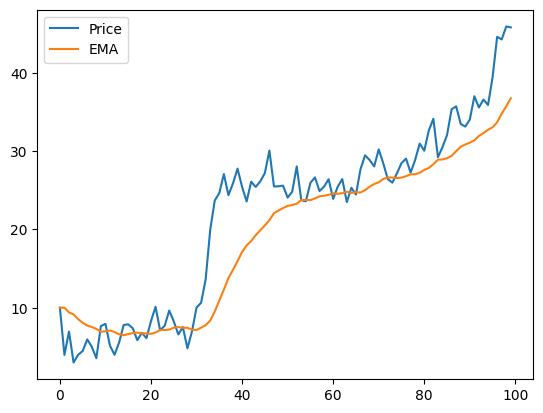

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### EMA - regular interval ###
def ema(p, u):
    a = 0.1
    return a * p + (1-a) * u

N = 100
p0 = 10
v = 2
delta_prices = np.random.normal(0, v, N)

p = p0
prices = []
for dp in delta_prices:
    prices.append(p)
    p += dp

    if p < 0:
        p = 0

emas = []
u = p0
for p in prices:
    emas.append(u)
    u = ema(p, u)



plt.plot(prices, label='Price')
plt.plot(emas)
plt.legend(['Price', 'EMA'])
plt.show()

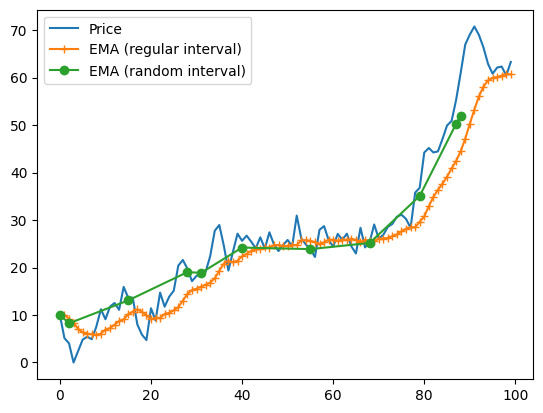

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math


H = 4
### EMA - regular interval ###
def ema(p, u, dt):
    a = 1 - math.exp(math.log(0.5) * dt / H)
    return a * p + (1-a) * u

N = 100
p0 = 10
v = 3
delta_prices = np.random.normal(1, v, N)

p = p0
prices = []
for dp in delta_prices:
    prices.append(p)
    p += dp

    if p < 0:
        p = 0

emas = [[],[]]
u = p0
for p in prices:
    emas[0].append(u)
    u = ema(p, u, 1)

t = 0
ts = []
u = p0
while t < N:
    ts.append(t)
    emas[1].append(u)

    dt = np.random.randint(1,2**H)
    t += dt

    if t < N:
        p = prices[t]
        u = ema(p, u, dt)



plt.plot(prices, label='Price')
plt.plot(emas[0], marker="+")
plt.plot(ts,emas[1], marker="o")
plt.legend(['Price', 'EMA (regular interval)', 'EMA (random interval)'])
plt.show()